In [2]:
# import everything necessary for basic logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# import dataset framingham.csv as data
data = pd.read_csv('framingham.csv')

In [4]:
# split data into X and y, where we are trying to predict TenYearCHD
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

In [5]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# handle any missing values
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression

# instantiate model using default parameters
logreg = LogisticRegression()

# fit model to training data
logreg.fit(X_train, y_train)

# make predictions on test data
y_pred = logreg.predict(X_test)

In [8]:
# create confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[718,   6],
       [115,   9]])

Text(33.0, 0.5, 'Actual')

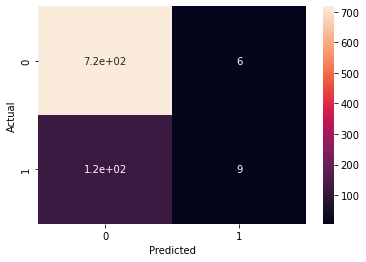

In [9]:
# visualize the confusion matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')